In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mplt
from matplotlib.ticker import FuncFormatter
import os

In [175]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [176]:
revenues_disclosed = pd.read_csv('CSV/revenues_disclosed.csv')

revenues_hidden = pd.read_csv('CSV/revenues_hidden.csv')

revenue_state = pd.read_csv('CSV/revenue_states.csv')

revenue_industry = pd.read_csv('CSV/revenue_industry.csv')

remove_outlier = pd.read_csv('CSV/remove_white.csv')

# Revenue

### Topics: 
     1. Revenue by Race
     2. Companies that Chose Not to Disclose Revenues
     3. Revenue by State and Race
     4. Revenue by Industry and Race

#### Revenue by Race

C:\Users\JassleenBhullar\AppData\Local\Temp\ipykernel_39544\2006833337.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


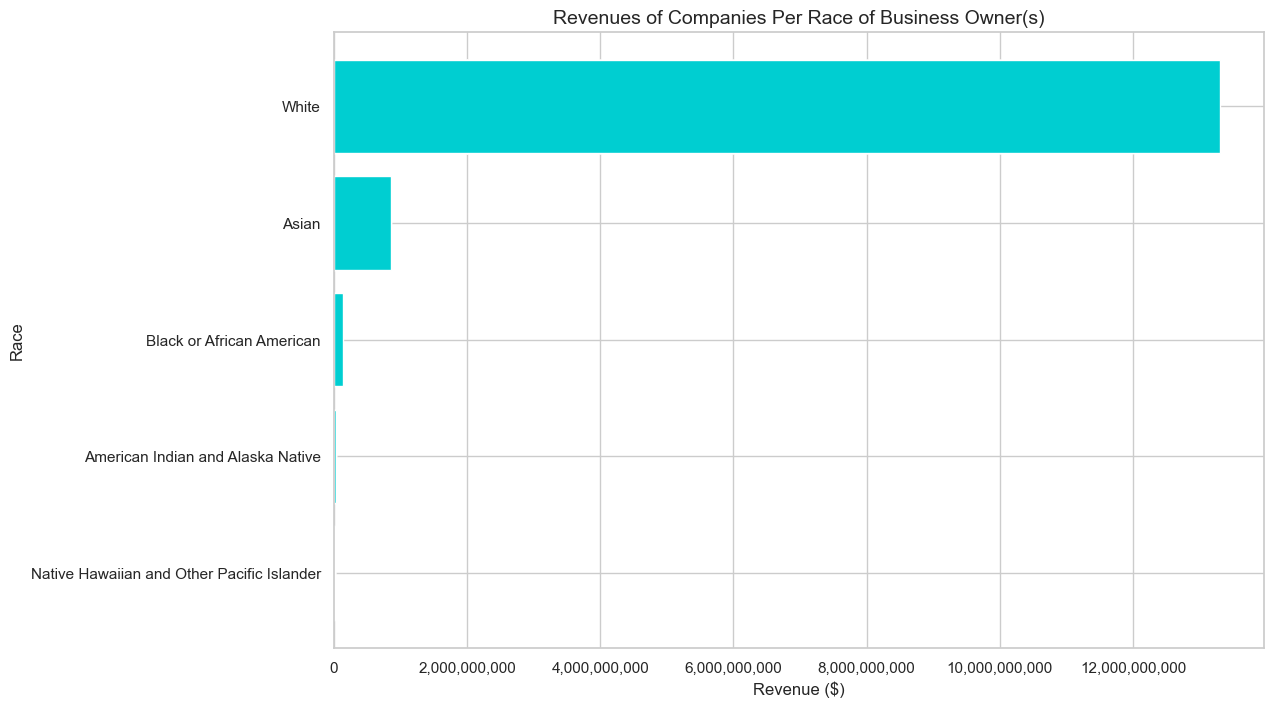

In [177]:
# sort values in df by revenue, descending order
revenues_disclosed = revenues_disclosed.sort_values('revenue')

plt.figure(figsize= (12,8))
y = revenues_disclosed['race']
x = revenues_disclosed['revenue']
ax = plt.barh(y, x, color = 'darkturquoise')
#change x-axis from log to numeric
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Revenues of Companies Per Race of Business Owner(s)', size = 14)
plt.xlabel('Revenue ($)', size = 12)
plt.ylabel('Race', size = 12);

C:\Users\JassleenBhullar\AppData\Local\Temp\ipykernel_39544\274402622.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


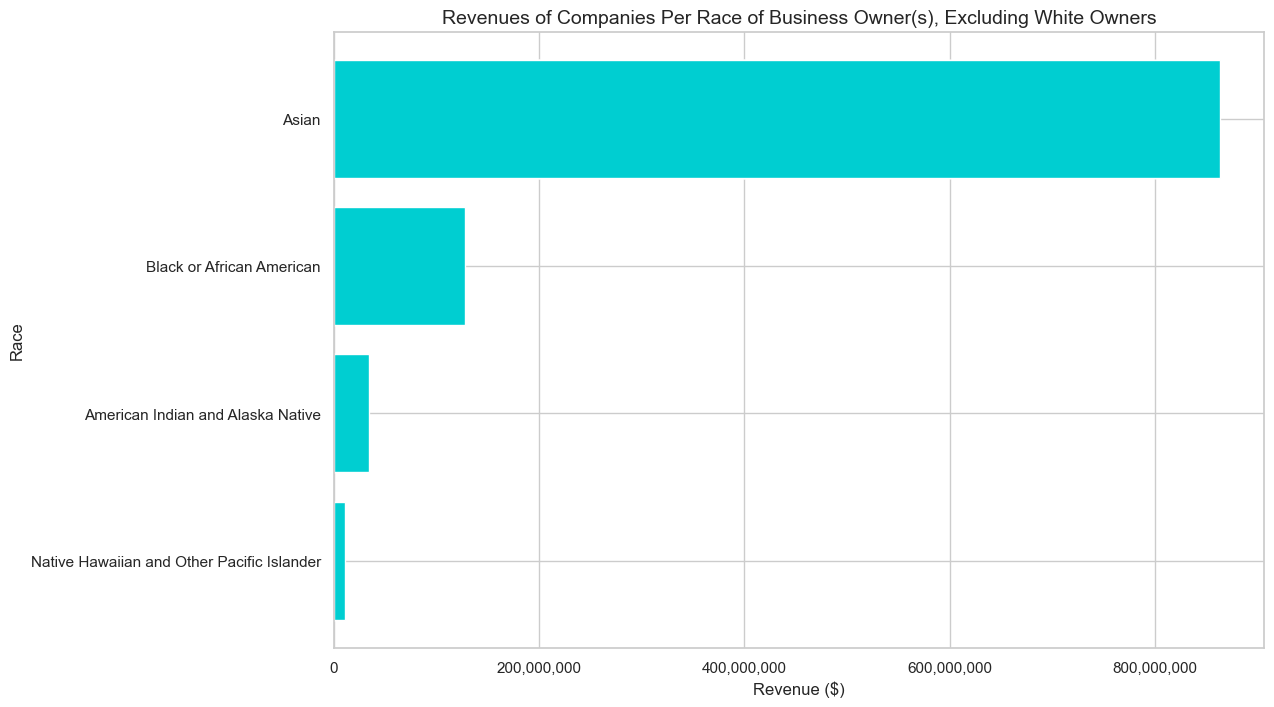

In [178]:
# sort values in df by revenue, descending order
remove_outlier = remove_outlier.sort_values('revenue')

plt.figure(figsize= (12,8))
y = remove_outlier['race']
x = remove_outlier['revenue']
plt.barh(y, x, color = 'darkturquoise')
#change x-axis from log to numeric
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Revenues of Companies Per Race of Business Owner(s), Excluding White Owners', size = 14)
plt.xlabel('Revenue ($)', size = 12)
plt.ylabel('Race', size = 12);

#### Companies that Chose Not to Disclose Revenues

During initial data analysis, we discovered that not every company had disclosed their exact revenue generated. Instead, some companies had opted to disclose a range that their company revenues fell within: These ranges are:

    1: Less than $1 million
    2: $1 million to less than $5 million
    3: $5 million to less than $15 million
    4: $15 million to less than $50 million
    5: $50 million to less than $75 million
    6: $75 million to less than $150 million
    7: $150 million to less than $500 million
    8: $500 million to less than $1 billion
    9: $1 billion to less than $5 billion
    10: $5 billion or more


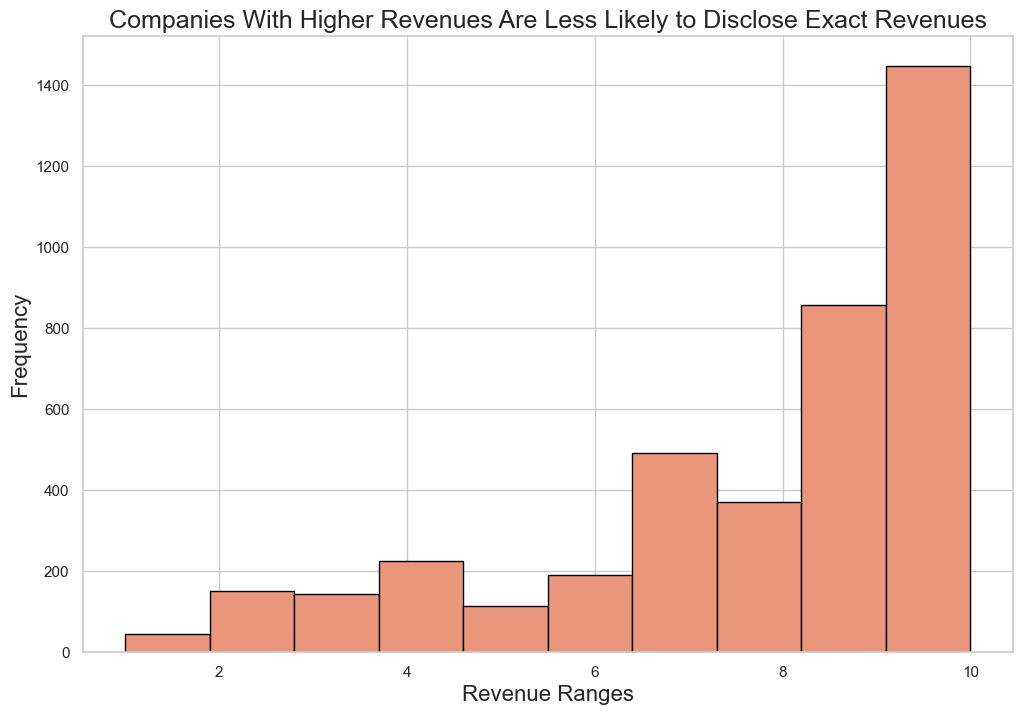

In [179]:
#replace revenue range letters with numbers for numeric scale
revenues_hidden['revenue_ranges'] = revenues_hidden['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.figure(figsize= (12,8))
plt.hist(revenues_hidden['revenue_ranges'], color = 'darksalmon', bins = 10, ec = 'black')
plt.title('Companies With Higher Revenues Are Less Likely to Disclose Exact Revenues', size=18)
plt.xlabel('Revenue Ranges', size=16)
plt.ylabel('Frequency', size=16);

#### Revenue by State and Race


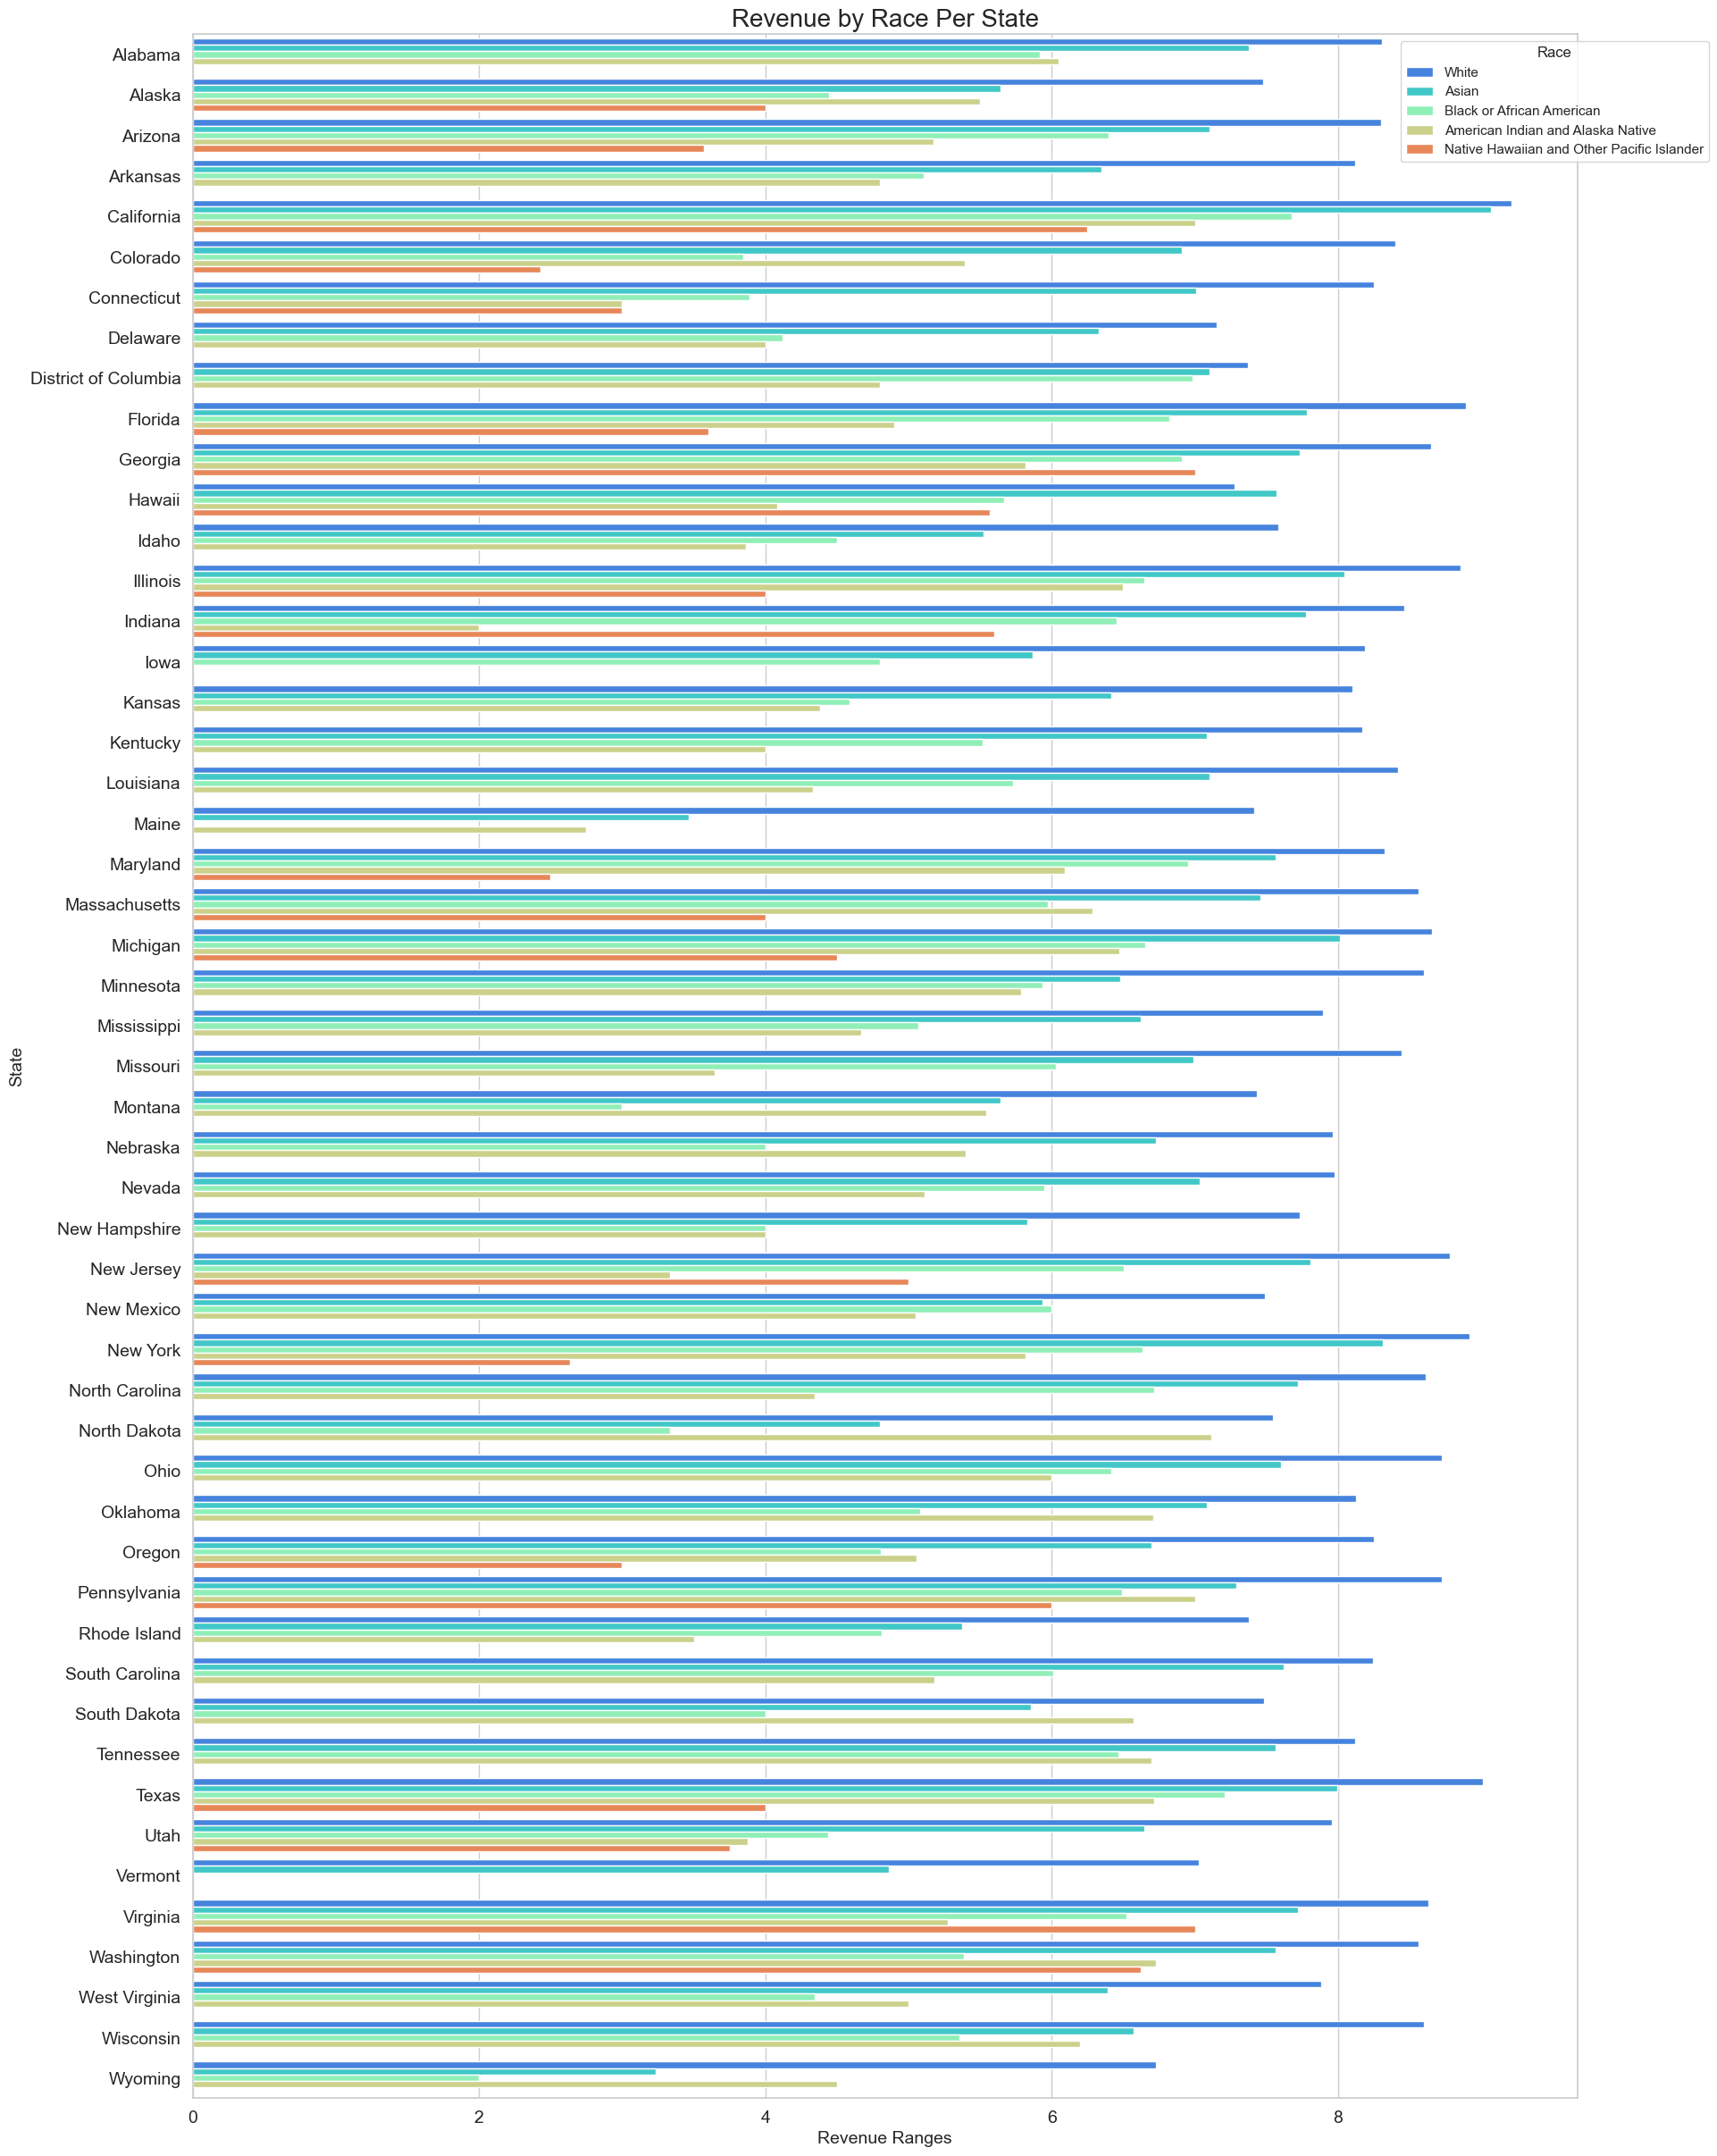

In [184]:
#replace revenue range letters with numbers for numeric scale
revenue_state['revenue_ranges'] = revenue_state['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#sort state names by alphabetical order
revenue_state = revenue_state.sort_values('name')

sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,30))
ax = sns.barplot(x='revenue_ranges', 
                 y='name',
                 data=revenue_state, 
                 palette='rainbow', 
                 hue='race',
                 ci=None)
plt.legend(bbox_to_anchor=(1.1, 1),loc='upper right', title='Race')
ax.set_title('Revenue by Race Per State', size=20)
ax.set_xlabel('Revenue Ranges', size=14)
ax.set_ylabel('State', size=14)
plt.yticks(size = 14)
plt.xticks(size = 14);

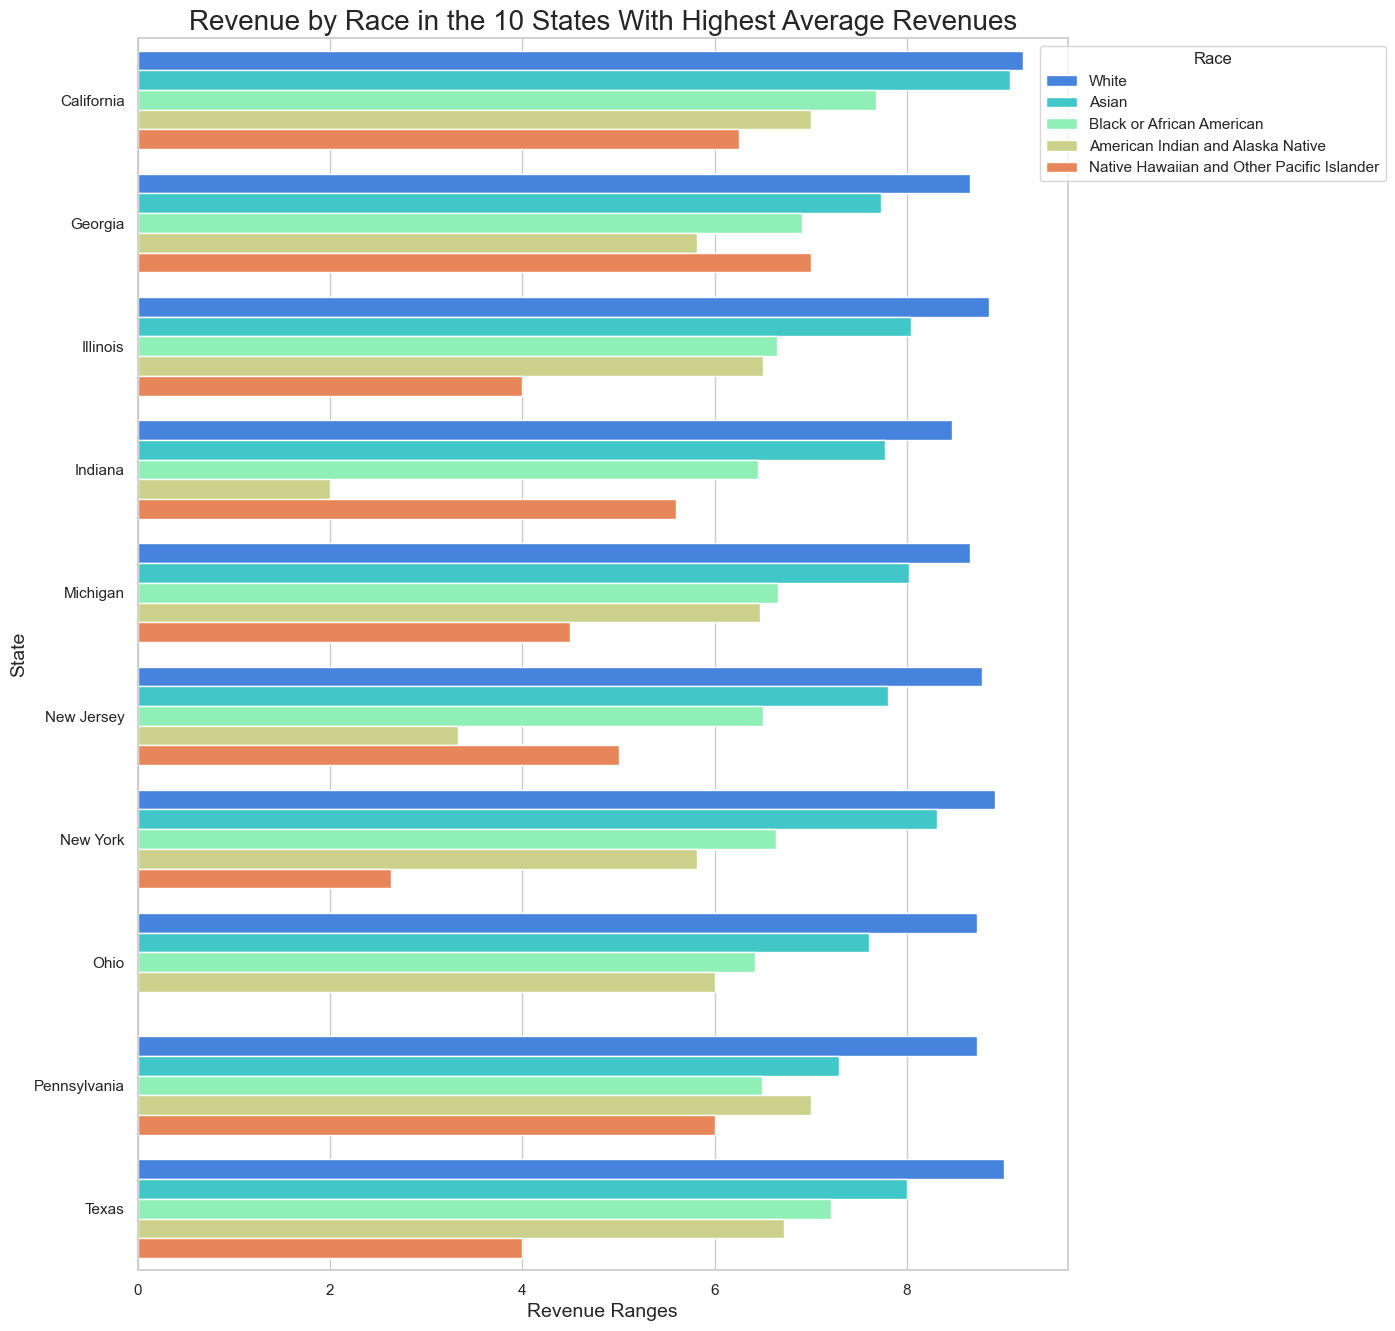

In [206]:
# filter out unnecessary columns and do group by to get average state revenues total
sorted_states = revenue_state[['state','name', 'revenue_ranges']]
sorted_states = sorted_states.groupby(['state','name'])['revenue_ranges'].mean().sort_values(ascending=False)
# take states with top 10 revenues
top = sorted_states.iloc[:10]
#store names of state in list
top10 = ['California', 'Texas', 'New York', 'Illinois', 'Ohio', 'Michigan', 'New Jersey', 'Pennsylvania', 'Indiana', 'Georgia']
#create dataframe with only the states that are in top10 (this dataframe includes race)
top10states = revenue_state[revenue_state.name.isin(top10)]

sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,16))
ax = sns.barplot(x='revenue_ranges', 
                 y='name',
                 data=top10states, 
                 palette='rainbow', 
                 hue='race',
                 ci=None)
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right', title='Race')

ax.set_title('Revenue by Race in the 10 States With Highest Average Revenues', size=20)
ax.set_xlabel('Revenue Ranges', size=14)
ax.set_ylabel('State', size=14);

#### Revenue by Industry and Race


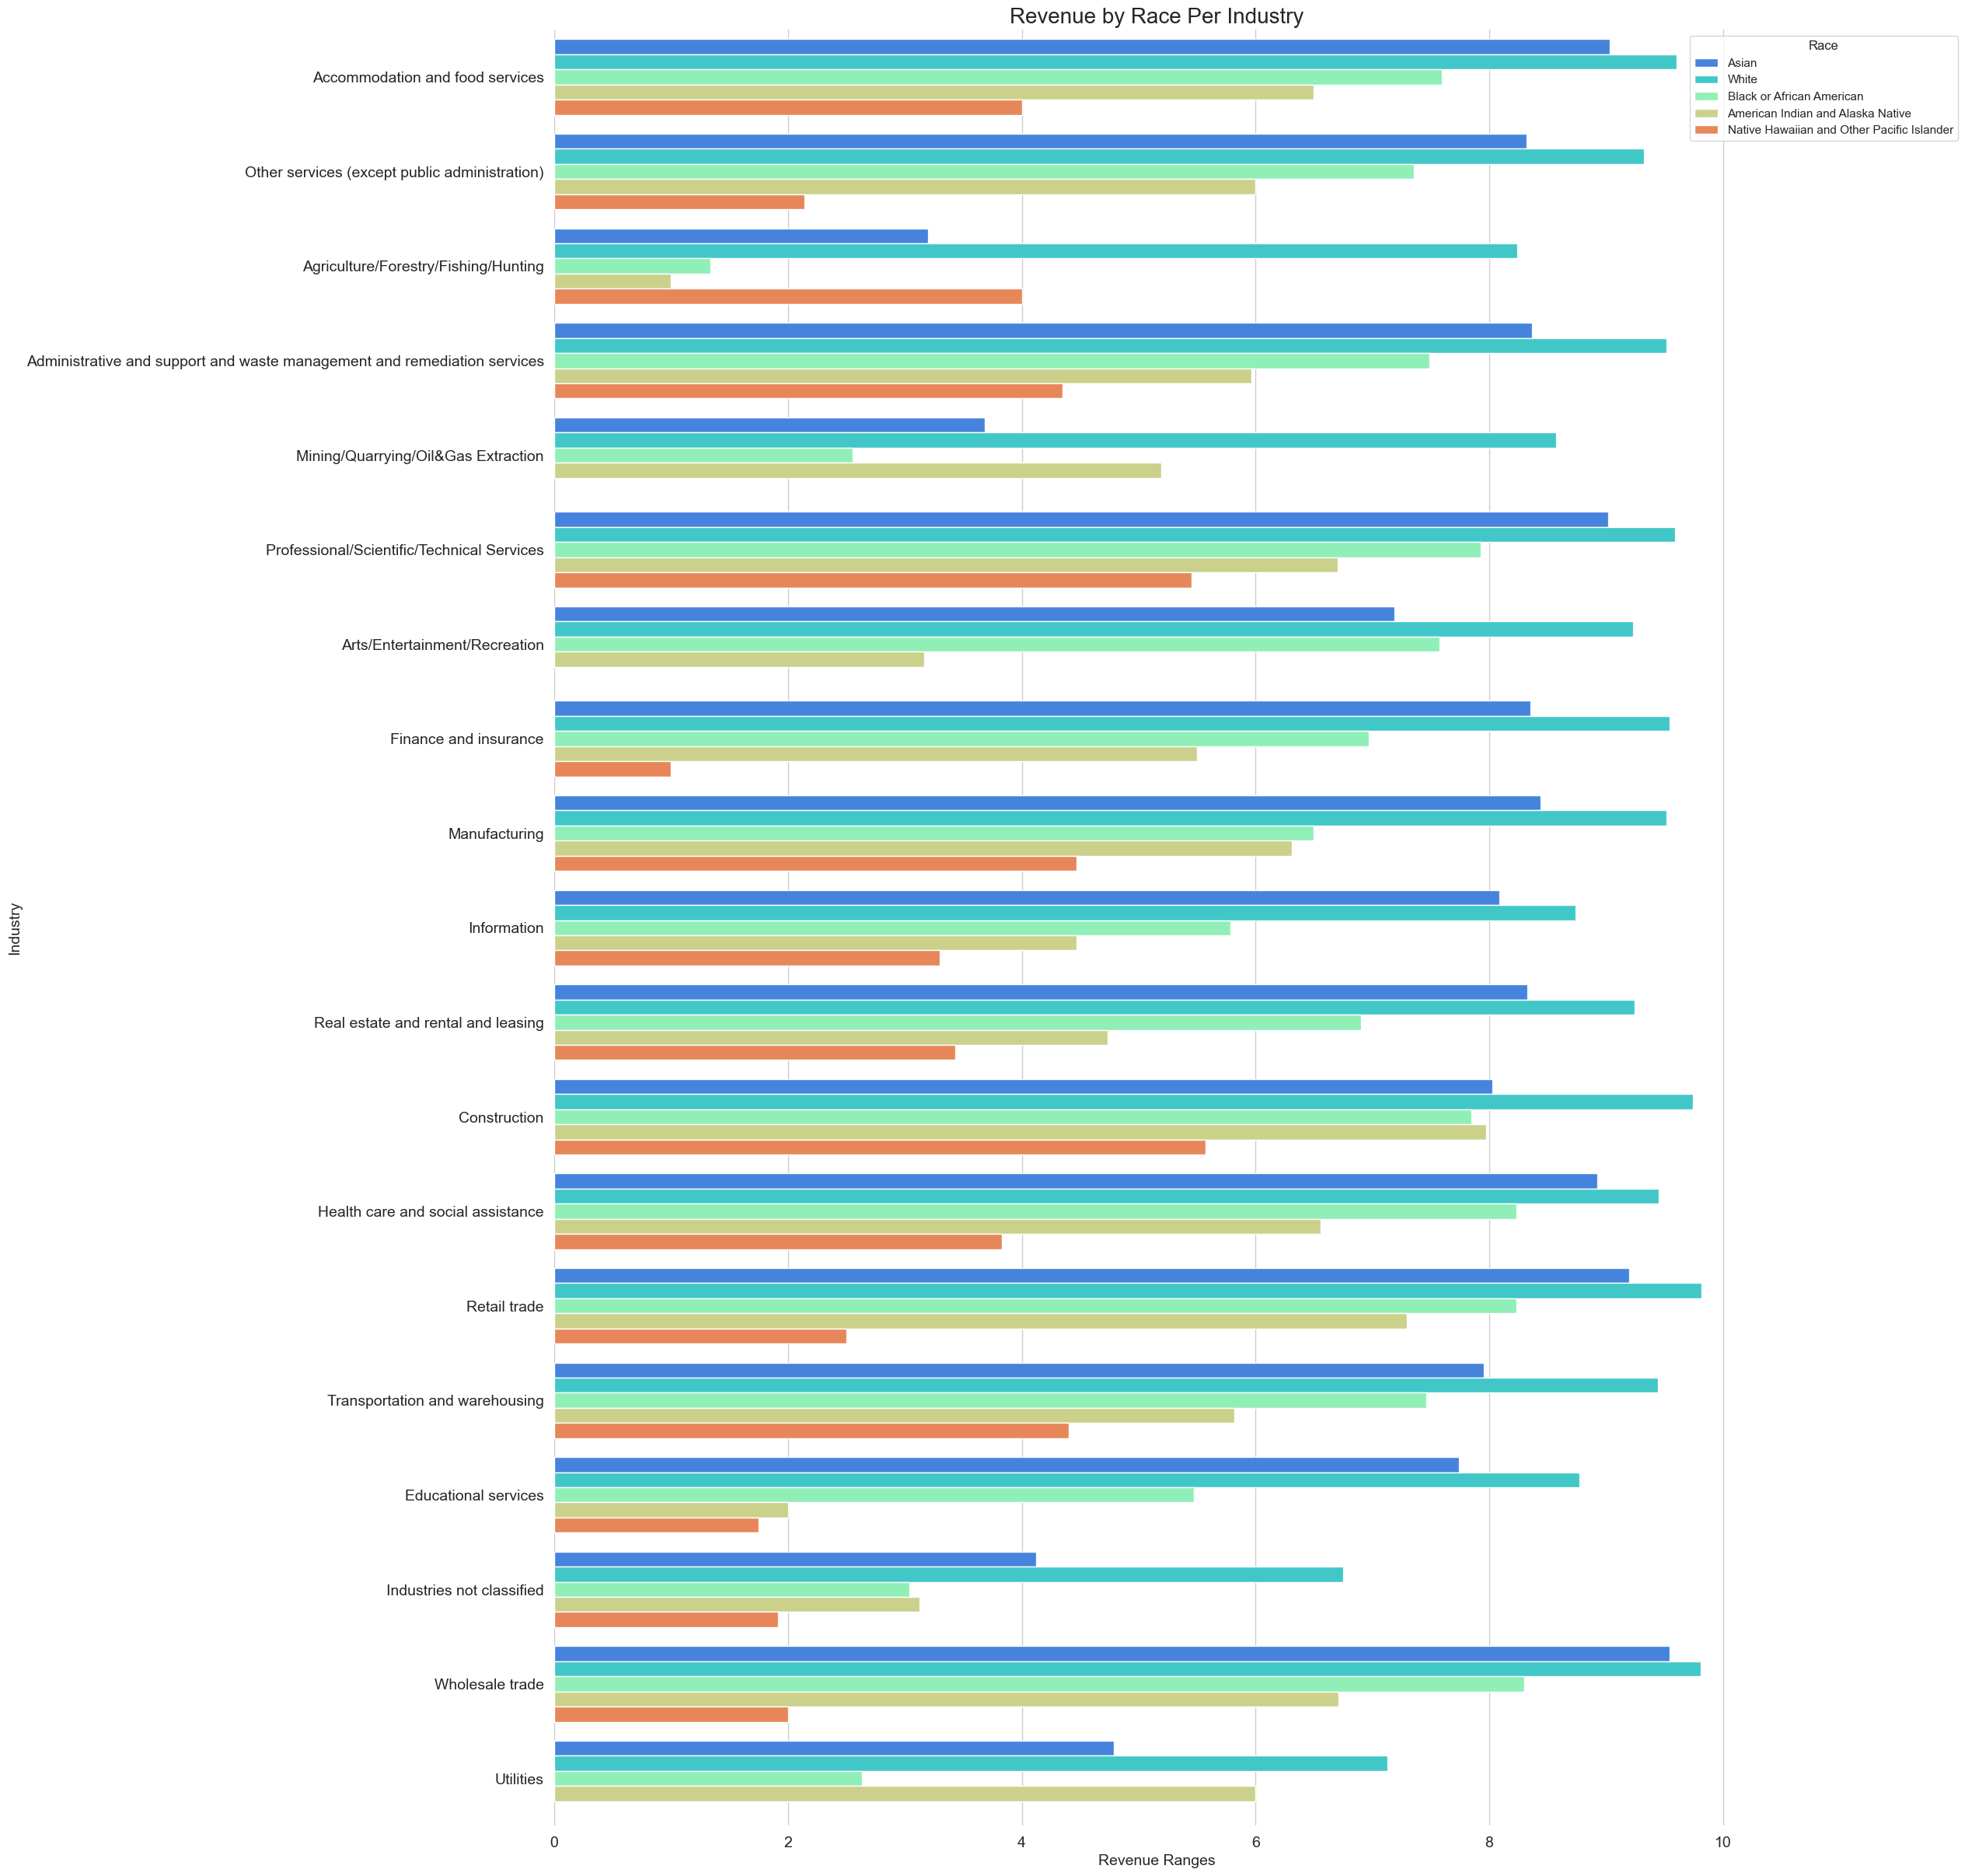

In [200]:
#change revenue range letters to numbers for a numeric range
revenue_industry['revenue_ranges'] = revenue_industry['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# sort industry names by highest revenues to lowest revenues
revenue_industry= revenue_industry.sort_values('revenue_ranges', ascending=False)

sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,30))
ax = sns.barplot(x='revenue_ranges', 
                 y='industry', 
                 data=revenue_industry, 
                 palette='rainbow', 
                 hue='race',
                 ci=None)
plt.legend(bbox_to_anchor=(1.17, 1),loc='upper right', title='Race')
ax.set_title('Revenue by Race Per Industry', size=20)
ax.set_xlabel('Revenue Ranges', size=14)
ax.set_ylabel('Industry', size=14)
sns.despine(left=True, bottom=True)
plt.yticks(size = 14)
plt.xticks(size = 14);